# feature Selection
차원을 줄이기 위해서 사용한다. (feature=차원)  
feature 선택하는 방법 3가지
1. filter
2. wrapper
3. imbedded

#### 데이터 로드

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()
iris_x = pd.DataFrame(data.data, columns=data.feature_names)
iris_y = pd.DataFrame(data.target, columns=["target"])
iris = pd.concat([iris_x, iris_y], axis=1)

C:\Users\JINHYO\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\JINHYO\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [3]:
from sklearn.feature_extraction import image

In [4]:
dir(image)

['BaseEstimator',
 'PatchExtractor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_compute_gradient_3d',
 '_compute_n_patches',
 '_make_edges_3d',
 '_mask_edges_weights',
 '_to_graph',
 'as_strided',
 'check_array',
 'check_random_state',
 'extract_patches',
 'extract_patches_2d',
 'grid_to_graph',
 'img_to_graph',
 'np',
 'numbers',
 'product',
 'reconstruct_from_patches_2d',
 'sparse']

> feature_extraction과 feature_selection은 다르다. 

# filter 방식
통계적 기법에 기반함

In [5]:
from sklearn.feature_selection import SelectKBest, chi2

In [13]:
skb = SelectKBest(k="all")

In [14]:
skb.fit(iris.iloc[:,:-1], iris.target)

SelectKBest(k='all', score_func=<function f_classif at 0x000002DF8FD24B70>)

In [16]:
skb.transform(iris.iloc[:,:-1])

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# wrapper 방식
통계값과 머신러닝 기법을 동시에 사용하여 기준을 두고 ranking을 구해 n개 column 뽑는 방법.

In [10]:
from sklearn.feature_selection import RFE

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfe = RFE(RandomForestClassifier(), 3) # 결과를 몇개로 낼 건지 고름.

In [41]:
rfe.fit_transform(iris.iloc[:,:-1], iris.target)

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

# embedded
- 알고리즘이 feature selection을 지원한다.

In [27]:
rf = RandomForestClassifier()

In [28]:
rf.fit(iris.iloc[:,:-1], iris.target)

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
rf.feature_importances_

array([0.09613567, 0.04086636, 0.40580445, 0.45719352])

> - 숫자가 클수록 feature의 중요도가 크다.
- 중요도가 낮은 feature를 제외하면 된다.

---
# PCA
차원을 줄이는 방법  
feature를 골라서 차원을 줄이는 것이 아니라 데이터를 대표하는새로운 feature를 만든다.

In [42]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(2) # 결과를 몇개 차원으로 낼 것인지 정함

In [46]:
pca.fit_transform(iris.iloc[:,:-1], iris.target)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

----

# Learning Curve
데이터에 따라서 학습 수준을 그래프로 그린다.

- 데이터가 충분한지,  
- 차원에 비해서 데이터가 충분한지,  
- 차원이 적절하게 줄여졌는지

를 파악할 수 있다.

In [47]:
from sklearn.model_selection import learning_curve

In [50]:
from sklearn_evaluation import plot

In [48]:
learning_curve(KNeighborsClassifier(), iris.iloc[:,:-1], iris.target, cv=10)

(array([ 13,  43,  74, 104, 135]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.98076923, 1.        , 0.98076923, 0.98076923, 0.98076923,
         0.98076923, 0.99038462, 0.98076923, 0.98076923, 0.98076923],
        [0.96296296, 0.97037037, 0.96296296, 0.97037037, 0.98518519,
         0.96296296, 0.97777778, 0.96296296, 0.96296296, 0.97037037]]),
 array([[0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.3

In [49]:
# unpacking 할당

train_size, train_score, test_score = learning_curve(KNeighborsClassifier(), iris.iloc[:,:-1], iris.target, cv=10)

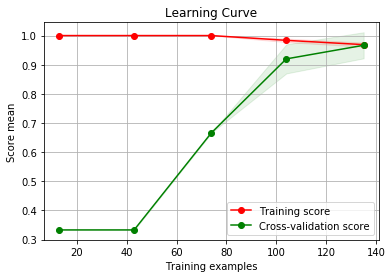

In [51]:
# sklearn의 learning curve를 unpacking 할당할 때랑 순서가 다름에 유의

plot.learning_curve(train_score, test_score, train_size) 

> - test score가 올라가는 추세로 끝났다. 
- 데이터가 더 있었으면 더 올라갔을지도 모른다. 
    - 데이터가 충분한지 아닌지 아직 모른다.
- training score와 test score가 만난다고 좋은게 아님!

In [52]:
train_size, train_score, test_score = learning_curve(RandomForestClassifier(), iris.iloc[:,:-1], iris.target, cv=10)

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

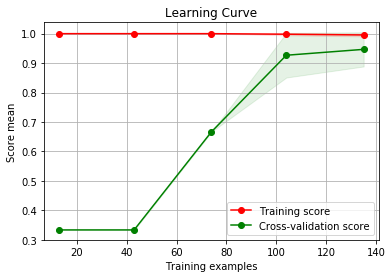

In [53]:
plot.learning_curve(train_score, test_score, train_size) 

> - RandomForestClassifier로 했을 때는 그래프가 또 다른다.
- 즉, 알고리즘마다 충분한 데이터 양이 다르다

In [55]:
train_size, train_score, test_score = learning_curve(RandomForestClassifier(), 
                                                     iris.iloc[:,:-1], 
                                                     iris.target, 
                                                     cv=10,
                                                     train_sizes=[.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

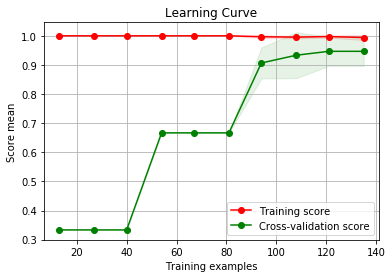

In [56]:
plot.learning_curve(train_score, test_score, train_size) 

> - `train_size` 옵션을 이용해서 그래프를 더 자세히 그릴 수 있다.

# "No Free Lunch!"
어떤 알고리즘에 어느정도의 데이터가 필요한지 알아내는 마법같은 공식은 없다.  
실험을 통해서 알아내야한다.  
https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko

---

# Confusion Matrix
모델 성능 평가하는 용도로 사용한다.  
예측한 값과 실제 값을 비교하는 표를 그려준다.  
heatmap 으로 시각화함

In [58]:
from sklearn_evaluation.plot import confusion_matrix
from sklearn.model_selection import train_test_split

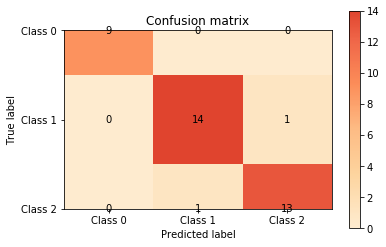

In [59]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.target)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

confusion_matrix(y_test, pred)